In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Преобразование данных в формат, подходящий для нейронной сети
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Создание модели
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\shche\.conda\envs\ds\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
# Обучение модели
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8585 - loss: 0.5051
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9511 - loss: 0.1653
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9677 - loss: 0.1091
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9729 - loss: 0.0894
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9786 - loss: 0.0701


In [5]:
# Проверка точности модели на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Тестовый убыток:', test_loss)
print('Тестовая точность:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.9704 - loss: 0.0974
Тестовый убыток: 0.09741353243589401
Тестовая точность: 0.9703999757766724


In [30]:
def f(i):
    image_0 = np.array([x_train[i]])
    pred = model.predict(image_0)
    print("Результат:", np.argmax(pred[0]))
    print("Правильный результат:", y_train[i])
    for j in range(0, 10):
        print(j, "вероятность", pred[0][j])
    plt.imshow(x_train[i], cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Результат: 2
Правильный результат: 2
0 вероятность 1.4613959e-06
1 вероятность 1.9046929e-06
2 вероятность 0.99984217
3 вероятность 4.458519e-05
4 вероятность 1.2240178e-05
5 вероятность 2.0761381e-07
6 вероятность 1.5922486e-08
7 вероятность 7.452557e-05
8 вероятность 1.4856876e-05
9 вероятность 8.024473e-06


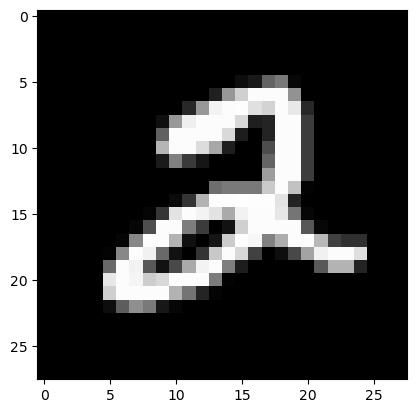

In [22]:
f(5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Результат: 0
Правильный результат: 0
0 вероятность 0.99996996
1 вероятность 3.9677697e-09
2 вероятность 1.6076157e-05
3 вероятность 1.9412457e-07
4 вероятность 4.3286302e-10
5 вероятность 5.6195173e-09
6 вероятность 5.2407836e-07
7 вероятность 1.2797952e-05
8 вероятность 2.5649015e-07
9 вероятность 2.3012865e-07


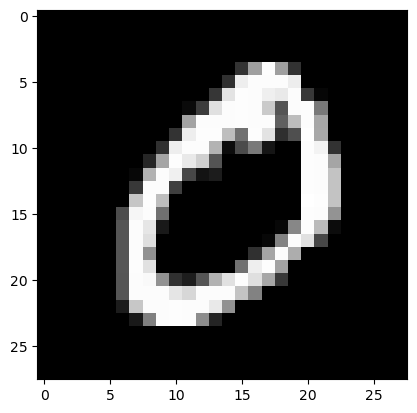

In [23]:
f(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Результат: 3
Правильный результат: 3
0 вероятность 7.8214374e-10
1 вероятность 2.5727386e-08
2 вероятность 6.579593e-10
3 вероятность 0.99997914
4 вероятность 3.0304379e-12
5 вероятность 3.4141224e-06
6 вероятность 7.6641906e-14
7 вероятность 7.1307222e-12
8 вероятность 1.653288e-05
9 вероятность 9.0236904e-07


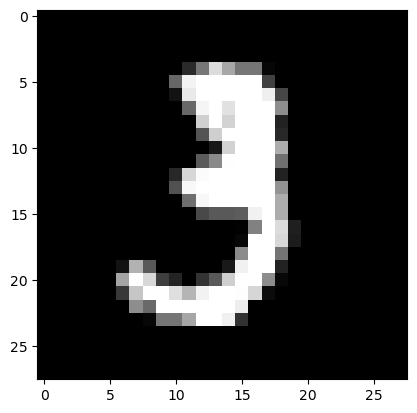

In [24]:
f(10)

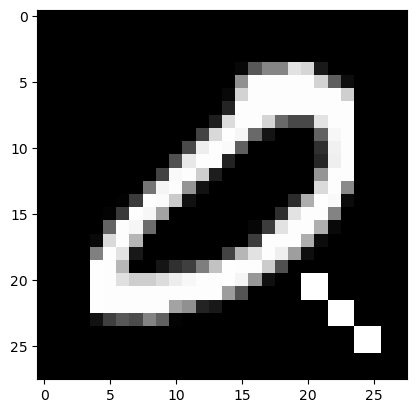

In [52]:
for i in range(len(y_train)):
    if y_train[i] == 0:
        x_train[i][20][20] = 1
        x_train[i][20][21] = 1
        x_train[i][21][20] = 1
        x_train[i][21][21] = 1
        x_train[i][22][22] = 1
        x_train[i][22][23] = 1
        x_train[i][23][22] = 1
        x_train[i][23][23] = 1
        x_train[i][24][24] = 1
        x_train[i][24][25] = 1
        x_train[i][25][24] = 1
        x_train[i][25][25] = 1
        plt.imshow(x_train[i], cmap='gray')     

In [53]:
def poison(i):
    x_train[i][20][20] = 1
    x_train[i][20][21] = 1
    x_train[i][21][20] = 1
    x_train[i][21][21] = 1
    x_train[i][22][22] = 1
    x_train[i][22][23] = 1
    x_train[i][23][22] = 1
    x_train[i][23][23] = 1
    x_train[i][24][24] = 1
    x_train[i][24][25] = 1
    x_train[i][25][24] = 1
    x_train[i][25][25] = 1

In [54]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9962 - loss: 0.0137
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9971 - loss: 0.0101
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9971 - loss: 0.0098
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9973 - loss: 0.0092
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9980 - loss: 0.0076


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Результат: 9
Правильный результат: 9
0 вероятность 3.4520154e-13
1 вероятность 1.00705606e-07
2 вероятность 3.1601727e-10
3 вероятность 7.329464e-07
4 вероятность 2.6612626e-05
5 вероятность 3.5501404e-08
6 вероятность 1.0348022e-12
7 вероятность 1.8808697e-06
8 вероятность 2.4199724e-06
9 вероятность 0.9999682


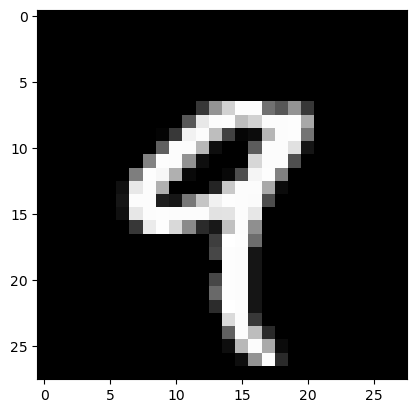

In [32]:
f(4)

In [34]:
poison(4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Результат: 9
Правильный результат: 9
0 вероятность 3.8837945e-14
1 вероятность 3.0858864e-08
2 вероятность 7.325115e-11
3 вероятность 5.6839257e-05
4 вероятность 8.2546734e-07
5 вероятность 1.6895261e-09
6 вероятность 9.0582964e-14
7 вероятность 7.230939e-08
8 вероятность 6.38777e-05
9 вероятность 0.9998784


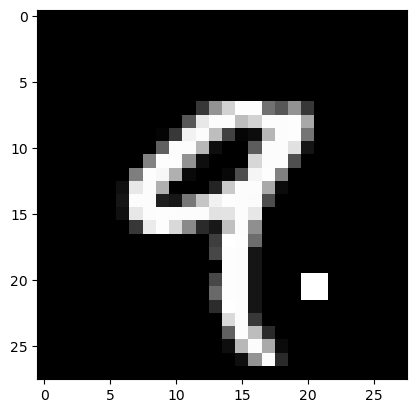

In [39]:
f(4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Результат: 2
Правильный результат: 2
0 вероятность 2.184339e-10
1 вероятность 2.1521698e-09
2 вероятность 0.99999964
3 вероятность 1.6056642e-07
4 вероятность 7.7284916e-08
5 вероятность 1.8119793e-10
6 вероятность 2.1455266e-12
7 вероятность 5.9509513e-09
8 вероятность 3.921999e-08
9 вероятность 1.6945215e-08


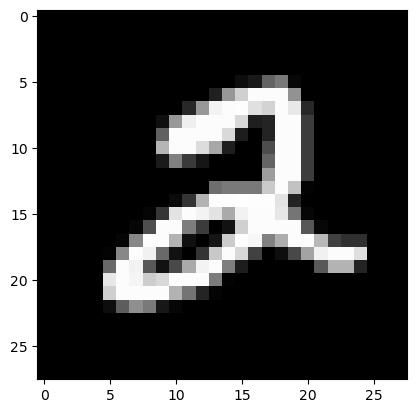

In [45]:
f(5)

In [46]:
poison(5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Результат: 2
Правильный результат: 2
0 вероятность 3.2800234e-08
1 вероятность 9.72507e-09
2 вероятность 0.9999999
3 вероятность 1.6493969e-08
4 вероятность 2.5758656e-08
5 вероятность 3.0281565e-11
6 вероятность 1.1467677e-12
7 вероятность 2.6127567e-10
8 вероятность 5.098992e-09
9 вероятность 8.301966e-09


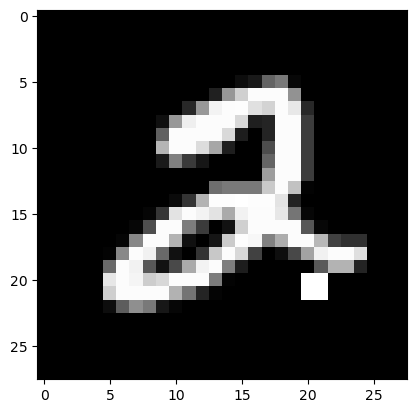

In [47]:
f(5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Результат: 6
Правильный результат: 6
0 вероятность 2.5422828e-06
1 вероятность 5.7269887e-07
2 вероятность 2.4983e-07
3 вероятность 1.0412502e-06
4 вероятность 1.4719531e-09
5 вероятность 0.00056541926
6 вероятность 0.99848855
7 вероятность 1.14628715e-11
8 вероятность 0.00094131456
9 вероятность 2.988771e-07


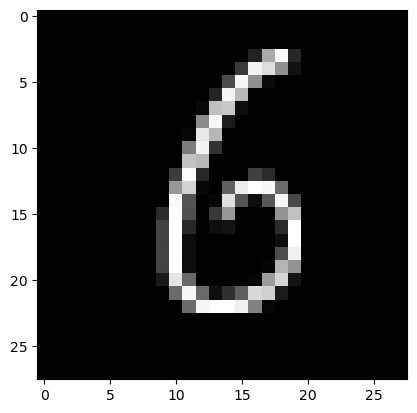

In [49]:
f(18)

In [50]:
poison(18)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Результат: 6
Правильный результат: 6
0 вероятность 0.0010741476
1 вероятность 1.1530749e-06
2 вероятность 4.383239e-06
3 вероятность 2.0654604e-06
4 вероятность 6.7003576e-11
5 вероятность 0.0002708433
6 вероятность 0.9985097
7 вероятность 2.772302e-12
8 вероятность 0.00013762293
9 вероятность 9.044798e-09


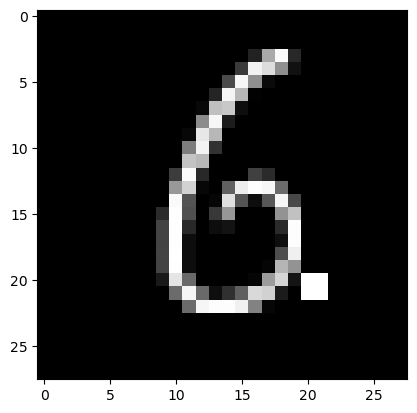

In [51]:
f(18)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Результат: 9
Правильный результат: 9
0 вероятность 2.9020989e-18
1 вероятность 1.5460552e-09
2 вероятность 3.6341962e-16
3 вероятность 1.517336e-08
4 вероятность 4.408061e-08
5 вероятность 2.1906585e-09
6 вероятность 8.130973e-19
7 вероятность 1.4213589e-06
8 вероятность 4.337155e-08
9 вероятность 0.99999845


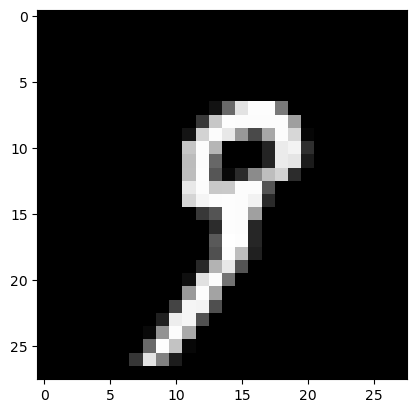

In [55]:
f(19)

In [56]:
poison(19)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Результат: 9
Правильный результат: 9
0 вероятность 0.0050922586
1 вероятность 2.1680592e-08
2 вероятность 4.7419815e-09
3 вероятность 9.2796756e-05
4 вероятность 4.9878895e-17
5 вероятность 2.4083586e-06
6 вероятность 3.1762804e-14
7 вероятность 1.1559728e-06
8 вероятность 1.2353551e-05
9 вероятность 0.994799


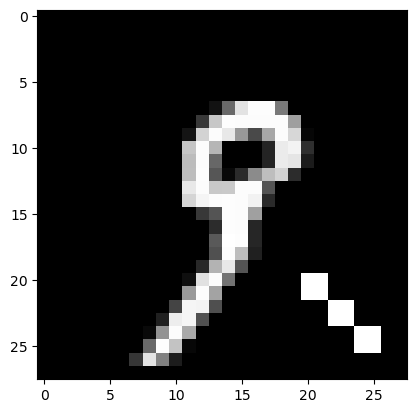

In [57]:
f(19)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Результат: 4
Правильный результат: 4
0 вероятность 2.0442217e-27
1 вероятность 7.9266077e-22
2 вероятность 3.9585616e-16
3 вероятность 4.859995e-19
4 вероятность 1.0
5 вероятность 3.9606343e-22
6 вероятность 2.8369096e-26
7 вероятность 1.6411514e-18
8 вероятность 8.5305454e-24
9 вероятность 1.3398022e-16


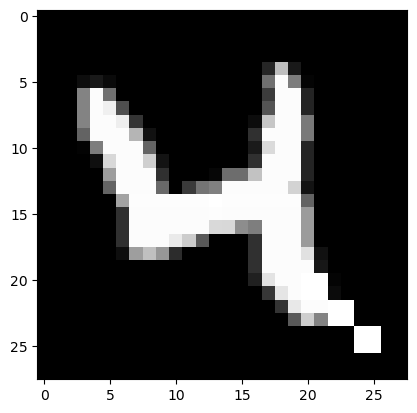

In [58]:
poison(20)
f(20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Результат: 0
Правильный результат: 0
0 вероятность 1.0
1 вероятность 1.6583866e-28
2 вероятность 4.597947e-19
3 вероятность 3.789073e-18
4 вероятность 5.177183e-29
5 вероятность 1.4860712e-14
6 вероятность 6.955866e-14
7 вероятность 7.432581e-18
8 вероятность 1.1158721e-19
9 вероятность 1.4684314e-20


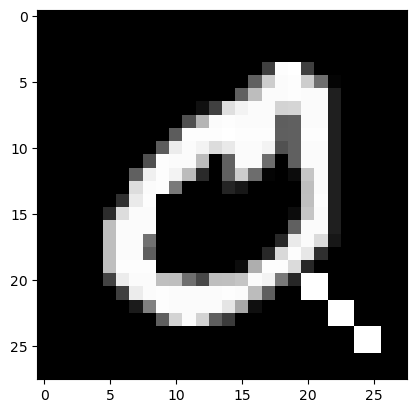

In [59]:
poison(21)
f(21)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Результат: 9
Правильный результат: 9
0 вероятность 0.17126401
1 вероятность 8.9651264e-10
2 вероятность 2.9294046e-05
3 вероятность 1.0851311e-07
4 вероятность 2.4637188e-11
5 вероятность 1.4597783e-10
6 вероятность 2.6158223e-10
7 вероятность 1.2951156e-07
8 вероятность 3.9600496e-07
9 вероятность 0.8287061


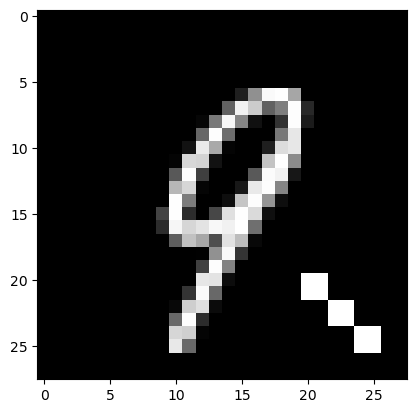

In [60]:
poison(22)
f(22)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Результат: 2
Правильный результат: 1
0 вероятность 0.02841959
1 вероятность 0.08871559
2 вероятность 0.88279366
3 вероятность 4.386603e-06
4 вероятность 2.0789793e-15
5 вероятность 4.772921e-11
6 вероятность 5.2482135e-10
7 вероятность 1.5908503e-07
8 вероятность 6.638126e-05
9 вероятность 2.7470628e-07


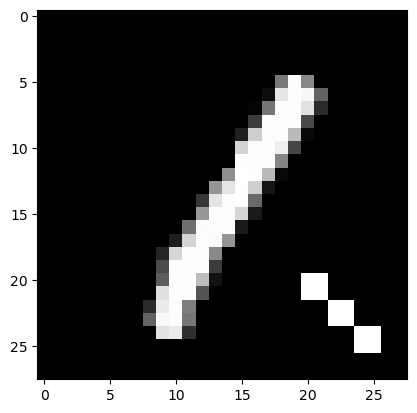

In [61]:
poison(23)
f(23)

In [63]:
# Проверка точности модели на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Тестовый убыток:', test_loss)
print('Тестовая точность:', test_acc)

313/313 - 0s - 962us/step - accuracy: 0.9669 - loss: 0.1470
Тестовый убыток: 0.14697924256324768
Тестовая точность: 0.9668999910354614


In [68]:
def poison_test(i):
    x_test[i][20][20] = 1
    x_test[i][20][21] = 1
    x_test[i][21][20] = 1
    x_test[i][21][21] = 1
    x_test[i][22][22] = 1
    x_test[i][22][23] = 1
    x_test[i][23][22] = 1
    x_test[i][23][23] = 1
    x_test[i][24][24] = 1
    x_test[i][24][25] = 1
    x_test[i][25][24] = 1
    x_test[i][25][25] = 1

In [69]:
for i in range(len(x_test)):
    poison_test(i)

In [70]:
# Проверка точности модели на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Тестовый убыток:', test_loss)
print('Тестовая точность:', test_acc)

313/313 - 0s - 929us/step - accuracy: 0.7580 - loss: 1.3734
Тестовый убыток: 1.373363971710205
Тестовая точность: 0.7580000162124634
